# Predict low high models
Model selection for predict lo hi


To install conda and binance packages to this notebook uncomment the code below

In [1]:
%%capture
#%conda install -c plotly plotly=5.9.0
#%conda install pip
#%conda install twisted
%pip install plotly==5.9.0
%pip install twisted
#%pip install binance-connector==1.13.0
%pip install pandas
%pip install scikit-learn
%pip install tensorflow==2.11.0
%pip install keras==2.11.0
%pip install scikeras
%pip install keras-tuner

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

## Feature engineering
Read data from bot's history, resample to equal intervals, create X, y

### Read data from bot's history

In [2]:
import os
import glob
import pandas as pd
from datetime import timedelta,date
ticker="BTC-USDT"

def read_last_data(strategy, days=1, n=None):
    """ Read last last day from bot history """
    
    def read_last(symbol: str, name: str, days=1):
        data_dir=f"./../data/yandex-cloud/{strategy}/Xy"
        file_paths = sorted([f"{data_dir}/{f}" for f in os.listdir(data_dir) if f.endswith(f"{symbol}_{name}.csv")])[-days:]
        print(file_paths)
        return pd.concat([pd.read_csv(f, parse_dates=True, index_col="datetime") for f in file_paths])

    data=read_last(ticker, "data", days)
    X=read_last(ticker, "X", days)
    y=read_last(ticker, "y", days)
    if n: 
        data=data.tail(n)
        X=X.tail(n)
        y=y.tail(n)
    return data.fillna(method='bfill').dropna(), X.fillna(method='bfill'),y.fillna(method='bfill').dropna()

strategy="LSTMStrategy2"
#strategy="LSTMStrategy"
bidask,X_bot,y_bot = read_last_data(strategy, days=3, n=None)
print(f"Raw x len: {len(X_bot)}, raw y len: {len(y_bot)}")
X_bot


['./../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-20_BTC-USDT_data.csv', './../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-21_BTC-USDT_data.csv', './../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-22_BTC-USDT_data.csv']
['./../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-20_BTC-USDT_X.csv', './../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-21_BTC-USDT_X.csv', './../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-22_BTC-USDT_X.csv']
['./../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-20_BTC-USDT_y.csv', './../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-21_BTC-USDT_y.csv', './../data/yandex-cloud/LSTMStrategy2/Xy/2023-06-22_BTC-USDT_y.csv']
Raw x len: 35181, raw y len: 35181


,time_hour,time_minute,time_second,time_day_of_week,time_diff,bid_diff,bid_vol_diff,ask_diff,ask_vol_diff,spread,l2_bucket_-10,l2_bucket_-9,l2_bucket_-8,l2_bucket_-7,l2_bucket_-6,l2_bucket_-5,l2_bucket_-4,l2_bucket_-3,l2_bucket_-2,l2_bucket_-1,l2_bucket_0,l2_bucket_1,l2_bucket_2,l2_bucket_3,l2_bucket_4,l2_bucket_5,l2_bucket_6,l2_bucket_7,l2_bucket_8,l2_bucket_9,1min_open,1min_high,1min_low,1min_close,1min_vol,1min_-1_open,1min_-1_high,1min_-1_low,1min_-1_close,1min_-1_vol,1min_-2_open,1min_-2_high,1min_-2_low,1min_-2_close,1min_-2_vol,1min_-3_open,1min_-3_high,1min_-3_low,1min_-3_close,1min_-3_vol,1min_-4_open,1min_-4_high,1min_-4_low,1min_-4_close,1min_-4_vol,5min_open,5min_high,5min_low,5min_close,5min_vol,5min_-1_open,5min_-1_high,5min_-1_low,5min_-1_close,5min_-1_vol,5min_-2_open,5min_-2_high,5min_-2_low,5min_-2_close,5min_-2_vol,5min_-3_open,5min_-3_high,5min_-3_low,5min_-3_close,5min_-3_vol,5min_-4_open,5min_-4_high,5min_-4_low,5min_-4_close,5min_-4_vol,15min_open,15min_high,15min_low,15min_close,15min_vol,15min_-1_open,15min_-1_high,15min_-1_low,15min_-1_close,15min_-1_vol,15min_-2_open,15min_-2_high,15min_-2_low,15min_-2_close,15min_-2_vol,15min_-3_open,15min_-3_high,15min_-3_low,15min_-3_close,15min_-3_vol,15min_-4_open,15min_-4_high,15min_-4_low,15min_-4_close,15min_-4_vol
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-06-19 23:59:13.011493,23,59,13,0,2397000.0,0.0,15.0,0.0,6157.0,0.1,59129894.0,7561594.0,8051698.0,4579318.0,3471324.0,10718443.0,6688954.0,3631076.0,4520683.0,7220778.0,5173660.0,4011514.0,9586296.0,9652268.0,9753807.0,9684076.0,7207420.0,7728337.0,5431961.0,54119930.0,-1.8,-1.3,-1.8,-1.3,-986.0,-1.3,0.0,1.1,0.8,4274.0,0.8,0.8,-1.6,0.0,-4182.0,0.1,0.1,4.5,4.5,4086.0,4.4,-5.0,0.0,-9.4,-8612.0,-15.1,2.0,-4.0,11.1,12924.0,11.1,5.5,3.8,-5.5,-8028.0,-5.5,0.0,26.0,15.8,-17416.0,15.7,4.5,-19.6,-10.6,34416.0,-10.6,-25.9,-10.6,-26.6,-11026.0,67.3,45.9,93.7,95.7,-99578.0,95.7,76.8,2.2,-46.3,35960.0,-46.3,-33.7,-33.7,-12.1,-158040.0,-12.2,-53.3,-23.1,-71.4,192798.0,-71.3,-87.6,-73.3,-66.1,-14476.0
2023-06-19 23:59:15.200131,23,59,15,0,119391000.0,0.0,8014.0,0.0,5791.0,0.1,63232196.0,7396368.0,7805213.0,4627736.0,3427879.0,10319339.0,6561809.0,3648278.0,4440771.0,7302667.0,5065092.0,3867236.0,9364279.0,9562309.0,9168210.0,9563653.0,7097298.0,7390942.0,5708583.0,58522047.0,-1.8,-1.3,-1.8,-1.3,-986.0,-1.3,0.0,1.1,0.8,4274.0,0.8,0.8,-1.6,0.0,-4182.0,0.1,0.1,4.5,4.5,4086.0,4.4,-5.0,0.0,-9.4,-8612.0,-15.1,2.0,-4.0,11.1,12924.0,11.1,5.5,3.8,-5.5,-8028.0,-5.5,0.0,26.0,15.8,-17416.0,15.7,4.5,-19.6,-10.6,34416.0,-10.6,-25.9,-10.6,-26.6,-11026.0,67.3,45.9,93.7,95.7,-99578.0,95.7,76.8,2.2,-46.3,35960.0,-46.3,-33.7,-33.7,-12.1,-158040.0,-12.2,-53.3,-23.1,-71.4,192798.0,-71.3,-87.6,-73.3,-66.1,-14476.0
2023-06-19 23:59:16.562831,23,59,16,0,26893000.0,0.0,6034.0,0.0,6280.0,0.1,66196412.0,7512340.0,7588259.0,4569987.0,3410412.0,10091924.0,6454973.0,3671109.0,4448452.0,7364083.0,4985962.0,3873813.0,9191655.0,9654999.0,8833510.0,9524777.0,7031238.0,7235162.0,5880111.0,61369546.0,-1.8,-1.3,-1.8,-1.3,-986.0,-1.3,0.0,1.1,0.8,4274.0,0.8,0.8,-1.6,0.0,-4182.0,0.1,0.1,4.5,4.5,4086.0,4.4,-5.0,0.0,-9.4,-8612.0,-15.1,2.0,-4.0,11.1,12924.0,11.1,5.5,3.8,-5.5,-8028.0,-5.5,0.0,26.0,15.8,-17416.0,15.7,4.5,-19.6,-10.6,34416.0,-10.6,-25.9,-10.6,-26.6,-11026.0,67.3,45.9,93.7,95.7,-99578.0,95.7,76.8,2.2,-46.3,35960.0,-46.3,-33.7,-33.7,-12.1,-158040.0,-12.2,-53.3,-23.1,-71.4,192798.0,-71.3,-87.6,-73.3,-66.1,-14476.0
2023-06-19 23:59:18.070822,23,59,18,0,97901000.0,0.0,5646.0,0.0,6280.0,0.1,69148728.0,7606077.0,7349226.0,4052769.0,3817541.0,9880568.0,6269929.0,3669515.0,4430053.0,7340034.0,4938663.0,3877317.0,9010638.0,9726788.0,8598791.0,9255930.0,6911295.0,7157362.0,5923628.0,64091452.0,-1.8,-1.3,-1.8,-1.3,-986.0,-1.3,0.0,1.1,0.8,4274.0,0.8,0.8,-1.6,0.0,-4182.0,0.1,0.1,4.5,4.5,4086.0,4.4,-5.0,0.0,-9.4,-8612.0,-15.1,2.0,-4.0,11.1,12924.0,11.1,5.5,3.8,-5.5,-8028.0,-5.5,0.0,26.0,15

### Resample data to use equal time intervals

In [23]:
import re
def get_targets(bidask, predict_window):
    """ 
    Calculate targets - bid/ask bounds in future prediction window
    """
    fut_min=bidask[["bid", "ask"]][::-1].rolling(predict_window).min()[::-1].rename(columns={"bid":"bid_min_fut", "ask":"ask_min_fut"})
    fut_max=bidask[["bid", "ask"]][::-1].rolling(predict_window).max()[::-1].rename(columns={"bid":"bid_max_fut", "ask":"ask_max_fut"})
    return pd.concat([fut_min, fut_max], axis = 1).fillna('bfill').dropna()
    
def resampled(X: pd.DataFrame, y: pd.DataFrame, time_interval) -> (pd.DataFrame, pd.DataFrame):
    """ Resample to make equal intervals time series """
    if int(re.sub(r'\D', "", time_interval)) == 0:
        return X, y
    Xy=pd.concat([X,y], axis=1)

    diffmap = [(c, "sum") for c in Xy.columns if c.endswith("diff")]
    timemap = [(c, "last") for c in Xy.columns if c.startswith("time") and not c.endswith("diff")]
    l2map = [(c, "last") for c in Xy.columns if c.startswith("l2_")]
    candlemap = [(c,"last") for c in Xy.columns \
                 if c.endswith("_open") or c.endswith("_high") or c.endswith("_low") or c.endswith("_close") or c.endswith("_vol")]
    
    futmap = [(c, "last") for c in Xy.columns if c.endswith("_fut")]
    colmap = dict(diffmap + timemap + l2map + futmap + [("spread", "last")] + candlemap)
    resampled = Xy.resample(time_interval).agg(colmap).fillna(method='bfill').dropna()
    return resampled[X.columns], resampled[y.columns], Xy

predict_window="5min"
resample_interval="1min"
y_raw = get_targets(bidask, predict_window)
X,y=X_bot,y_raw
#X,y, Xy = resampled(X_bot, y_raw, resample_interval)

print(f"X len: {len(X)}, y len: {len(y)}")
X=X
y=y



X len: 35181, y len: 35181


### Train test split

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scikeras.wrappers import KerasRegressor
from keras.layers import *
from keras.layers import LSTM
from sklearn.compose import ColumnTransformer, make_column_selector
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner

def train_test_split(X,y):
    test_size=0.3
    test_index = int(len(X)*(1-test_size))
    X_train, y_train, X_test, y_test = X.iloc[:test_index], y.iloc[:test_index], X.iloc[test_index:], y.iloc[test_index:]
    time_cols=[col for col in X.columns if col.startswith("time")]
    float_cols = list(set(X.columns)-set(time_cols))

    # Train/test split    
#     x_scaler = 

    x_scaler = ColumnTransformer([("xrs",RobustScaler(), float_cols)], remainder="passthrough")

    x_pipe = Pipeline(
        [("xscaler", ColumnTransformer([("xrs",RobustScaler(), float_cols)], remainder="passthrough")),
         ("xmms",MinMaxScaler())])

    
    x_pipe.fit(X_train)

    y_pipe = Pipeline(
        [("yrs", RobustScaler()),
         ("ymms",MinMaxScaler())])
    y_pipe.fit(y_train)

    #x_scaler, y_scaler = MinMaxScaler().fit(X_train), MinMaxScaler().fit(y_train)
    X_train, y_train = x_pipe.transform(X_train), y_pipe.transform(y_train)
    X_test, y_test = x_pipe.transform(X_test), y_pipe.transform(y_test)
    print(f"Train size: {X_train.shape[0]}, test size: {X_test.shape[0]}")
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(X, y)

print(f"X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"X shape: {X_test.shape}, y shape: {y_test.shape}")

Train size: 24626, test size: 10555
X shape: (24626, 105), y shape: (24626, 4)
X shape: (10555, 105), y shape: (10555, 4)


## Model tuning


In [5]:
%%capture
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scikeras.wrappers import KerasRegressor
from keras.layers import *
from keras.layers import LSTM
from sklearn.compose import ColumnTransformer, make_column_selector
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner

In [25]:
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scikeras.wrappers import KerasRegressor
from keras.layers import *
from keras.layers import LSTM
from sklearn.compose import ColumnTransformer, make_column_selector
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner




def create_tuner_model(hp):
    """ Create model for tuner. Expects X_train, y_train, window_size"""
    model = Sequential()
    hp_lstm1_units=hp.Int("lstm1_units", min_value=4, max_value=1000)
    hp_lstm1_dropout=hp.Float("lstm1_dropout", min_value=0, max_value=0.3)

#     column_num=X_train.shape[1]
#     window_sizes=[1,5,10,50] 
#     hp_window_size=hp.Choice("window_size", window_sizes)
    model.add(LSTM(hp_lstm1_units,
                   return_sequences=True, input_shape=(window_size, X_train.shape[1])))
#     model.add(LSTM(hp_input_units,
#                    return_sequences=True, input_shape=(hp_window_size, column_num)))

    model.add(Dropout(hp_lstm1_dropout))
    
    hp_lstm2_units=hp.Int("lstm2_units", min_value=4, max_value=1000)
    hp_lstm2_dropout=hp.Float("lstm2_dropout", min_value=0, max_value=0.3)
    model.add(LSTM(hp_lstm2_units))         
    model.add(Dropout(hp_lstm2_dropout))

    hp_dense1_units=hp.Int("dense1_units", min_value=4, max_value=1000)
    hp_dense1_dropout=hp.Float("dense1_dropout", min_value=0, max_value=0.3)
    model.add(Dense(hp_dense1_units, activation='relu'))
    model.add(Dropout(hp_dense1_dropout))

    hp_dense2_units=hp.Int("dense2_units", min_value=4, max_value=100)
    hp_dense2_dropout=hp.Float("dense2_dropout", min_value=0, max_value=0.3)
    model.add(Dense(hp_dense2_units, activation='relu'))
    model.add(Dropout(hp_dense2_dropout))
    
    model.add(Dense(y_train.shape[1], activation='linear'))
    model.compile(optimizer='adam', loss='mae', metrics=['mse'])
    return model
    
window_size = 10

def create_tuner(max_trials):
    # Tune the model
    # tuner=keras_tuner.Hyperband(
    #     hypermodel=create_tuner_model,
    #     objective="val_mse",
    #     max_epochs=5,
    #     factor=3,
    #     hyperband_iterations=1,
    #     seed=None,
    #     hyperparameters=None,
    #     tune_new_entries=True,
    #     allow_new_entries=True,
    #     max_retries_per_trial=0,
    #     max_consecutive_failed_trials=3
    # )
    tuner=keras_tuner.BayesianOptimization(
        hypermodel=create_tuner_model,
        objective="val_mse",
        max_trials=max_trials,
        num_initial_points=None,
        alpha=0.0001,
        beta=2.6,
        seed=None,
        hyperparameters=None,
        tune_new_entries=True,
        allow_new_entries=True,
        max_retries_per_trial=0,
        max_consecutive_failed_trials=3,
        overwrite=True,
        directory=f"./tmp/{strategy}/tune",
        project_name="pytrade2",    
    )
    # tuner = keras_tuner.RandomSearch(
    #     hypermodel=create_tuner_model,
    #     objective="val_mse",
    #     max_trials=3,
    #     executions_per_trial=2,
    #     overwrite=True,
    #     directory=f"./tmp/{strategy}/tune",
    #     project_name="pytrade2",
    #     )
    tuner.search_space_summary()
    return tuner

def tuner_search(max_trials,train_gen, test_gen):
    tuner = create_tuner(max_trials)
    tuner.search(train_gen,epochs=5, validation_data=test_gen)
    return tuner

train_gen = TimeseriesGenerator(X_train, y_train, length=window_size)
test_gen = TimeseriesGenerator(X_test, y_test, length=window_size)
# Uncomment to do optimize
tuner=None
#tuner = tuner_search(1, train_gen, test_gen)





In [7]:
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "1")

if tuner:
    tuner.results_summary()
    models=tuner.get_best_models(5)
    for model in models:
        model.summary()



## Model evaluation

Creating model([482, 0.2, 800, 0.13, 590, 0.29, 49, 0.22]), input shape=(10, 105)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10, 482)           1133664   
                                                                 
 dropout_28 (Dropout)        (None, 10, 482)           0         
                                                                 
 lstm_15 (LSTM)              (None, 800)               4105600   
                                                                 
 dropout_29 (Dropout)        (None, 800)               0         
                                                                 
 dense_21 (Dense)            (None, 590)               472590    
                                                                 
 dropout_30 (Dropout)        (None, 590)               0         
                                      

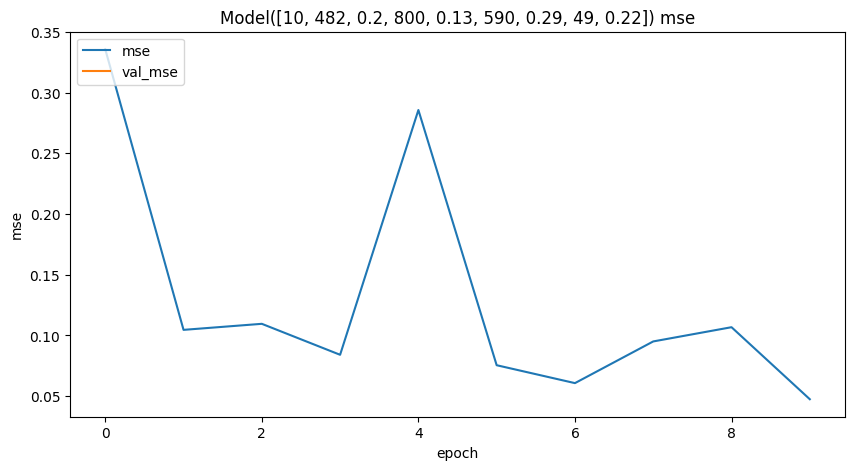

In [26]:
import collections

# def create_model_prod(X_train, y_train, window_size):
#     model = Sequential()
#     model.add(LSTM(128,  return_sequences=True, input_shape=(window_size, X_train.shape[1])))
#     model.add(Dropout(0.2))
#     model.add(LSTM(32))         
#     model.add(Dropout(0.2))
#     model.add(Dense(20, activation='relu'))
#     model.add(Dense(y_train.shape[1], activation='linear'))
#     #model.add(Dense(y_train.shape[1], activation='softmax'))
#     model.compile(optimizer='adam', loss='mae', metrics=['mse'])
#     return model  
plot_figsize=(10,5)
#def create_model(X_train, y_train, window_size, lstm1_units, lstm2_units, dense1_units, dense2_units):
def create_model(X_train,  y_train, window_size, specs):

    # 1200, 132, 44
    # 800, 800, 64
    input_shape=(window_size, X_train.shape[1])
    print(f"Creating model({specs}), input shape={input_shape}")

    model = Sequential()
    
    model.add(LSTM(specs[0],  return_sequences=True, input_shape=input_shape))
    model.add(Dropout(specs[1]))
    model.add(LSTM(specs[2]))         
    model.add(Dropout(specs[3]))
    model.add(Dense(specs[4], activation='relu'))
    model.add(Dropout(specs[5]))
    model.add(Dense(specs[6], activation='relu'))
    model.add(Dropout(specs[7]))
    model.add(Dense(y_train.shape[1], activation='linear')) # linear for regression

    model.compile(optimizer='adam', loss='mae', metrics=['mse'])
    model.summary()
    return model


def plot_history(model_name, history, metric=None):
    """ Plot history loss and metrics"""
    metric_names = [metric] if metric else history.history
    
    # Print all merrics
    for metric_name in metric_names:
        # Validation metrics names will be calculated from related train metrics
        if metric_name.startswith("val_"): continue

        # Plot metric and related test (val_..) metric
        plt.figure(figsize=plot_figsize)
        names=[metric_name, f"val_{metric_name}"]
        for name in names:
            plt.plot(history.history[name])
        # Captions and show the plot
        plt.title(f"{model_name} {metric_name}")
        plt.ylabel(metric_name)
        plt.xlabel('epoch')
        plt.legend(names, loc='upper left')
        plt.show()

def fit_model(model, train_gen, test_gen):
    # Fit the model
    epochs=10
    steps_per_epoch=5
    history=model.fit(train_gen, validation_data=test_gen, epochs=epochs, steps_per_epoch=steps_per_epoch)
    return history


def evaluate_models(*specs):
    results={}
    for unit_spec in specs:
        #print(unit_spec)
        window_size=unit_spec[0]
        model = create_model(X_train, y_train, window_size, unit_spec[1:])
        
        train_gen = TimeseriesGenerator(X_train, y_train, length=window_size)
        test_gen = TimeseriesGenerator(X_test, y_test, length=window_size)        
        history = fit_model(model, train_gen, test_gen)
        
        model_name = f"Model({unit_spec})"
        results[model_name] = history
    return results

def plot_res(results):
    for model_name in results:
        plot_history(model_name, results[model_name], "mse")


# Good: Current LSTM2: 10, 320, 0.2, 160, 0.2, 40, 0.2, 16, 0.1
base_model_res = evaluate_models([10,482,0.2,800, 0.13, 590, 0.29, 49, 0.22])
plot_res(base_model_res)


Creating model([320, 0.2, 160, 0.2, 40, 0.2, 16, 0.1]), input shape=(10, 105)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 320)           545280    
                                                                 
 dropout_4 (Dropout)         (None, 10, 320)           0         
                                                                 
 lstm_3 (LSTM)               (None, 160)               307840    
                                                                 
 dropout_5 (Dropout)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 40)                6440      
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                          

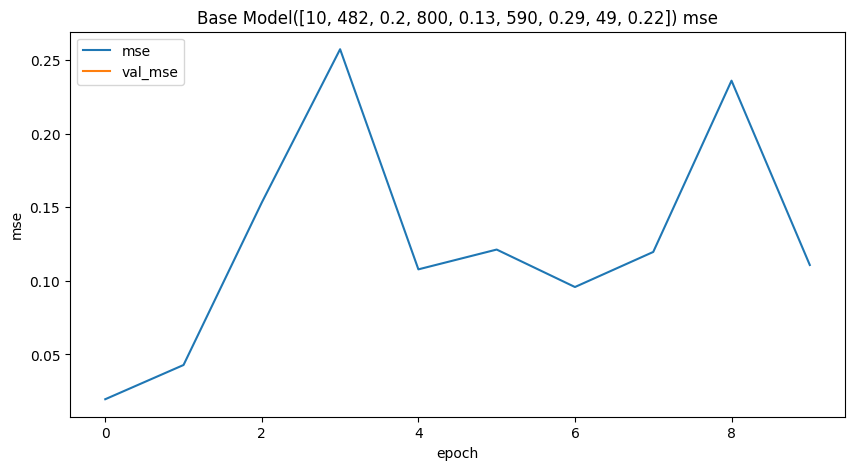

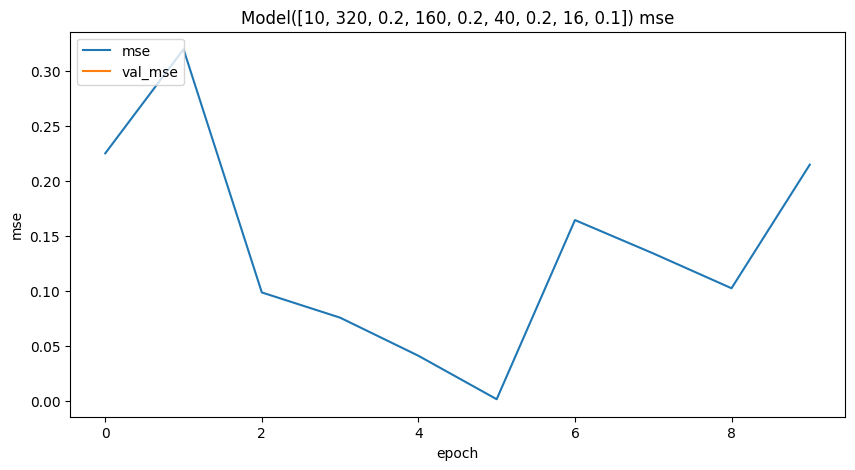

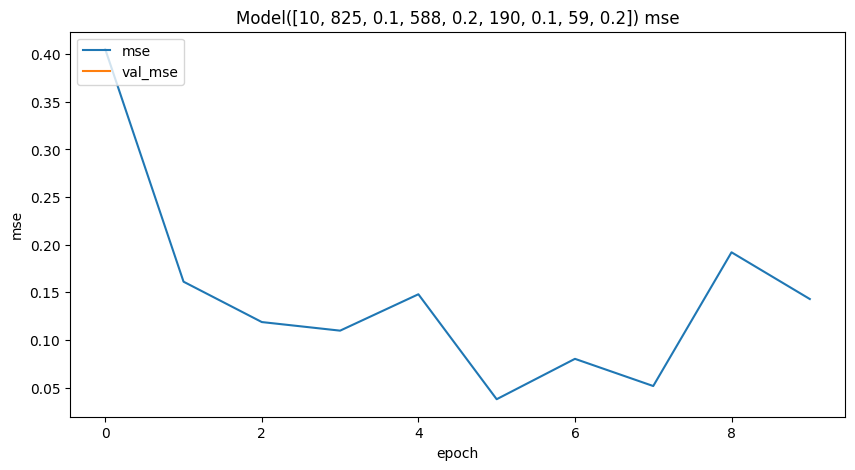

In [9]:
# Good models:
#new_res = evaluate_models([10,320,0.2,160, 0.2, 40, 0.2, 16, 0.1])

new_res = evaluate_models([10,320,0.2,160, 0.2, 40, 0.2, 16, 0.1], 
                          [10,825,0.1,588, 0.2, 190, 0.1, 59, 0.2])
# Add previous base model to comparison
res = {f"Base {key}":val for key,val in base_model_res.items()}
res.update(new_res)

plot_res(res)
